# Project Summary: Client Subscribed to a Term Deposit


## Introduction

This project involves analyzing data from a bank's marketing campaign to predict whether a client will subscribe to a term deposit.
The dataset includes various attributes such as job, marital status, education, default status, balance, and other socio-economic indicators.
The goal is to build a classification model and derive insights that can improve future campaign strategies.



## What We Did

- Loaded and inspected the `bankmarketing.csv` dataset.
- Handled missing values and performed necessary data cleaning.
- Conducted exploratory data analysis (EDA) to identify key patterns and relationships.
- Encoded categorical variables and normalized numerical features.
- Split the data into training and testing sets.
- Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
- Measured model performance using accuracy, precision, recall, and F1-score.



## What We Learned

- Variables such as `contact`, `poutcome`, `month`, and `duration` were among the most significant predictors for term deposit subscription.
- The marketing campaign was more effective during certain months, particularly around May and August.
- A longer call duration was correlated with a higher likelihood of subscription.
- Ensemble models like Random Forest generally performed better in predictive accuracy.


<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
  Step 1 : Import Libraries
</p>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
  Step 2 : Load Dataset
</p>


In [7]:
df = pd.read_csv("bankmarketing.csv")
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
   Step 3: Handle Missing Values and Clean Data
</p>

In [8]:
print(f"\nInitial dataset shape: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {df.shape}")


Initial dataset shape: (41188, 21)
Shape after dropping duplicates: (41176, 21)


### Check for missing values

In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Drop missing values if any

In [10]:
df.dropna(inplace=True)
print(f"Shape after dropping missing values: {df.shape}")

Shape after dropping missing values: (41176, 21)


<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 4: Exploratory Data Analysis (EDA)
    </p>

#### 4.1 Target Variable Distribution

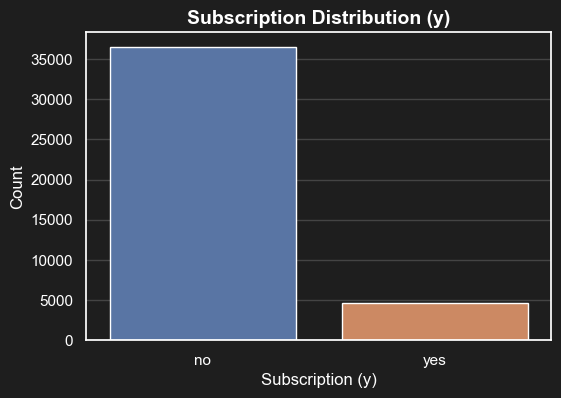

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='y')
plt.title('Subscription Distribution (y)')
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.show()

#### 4.2 Job vs Subscription

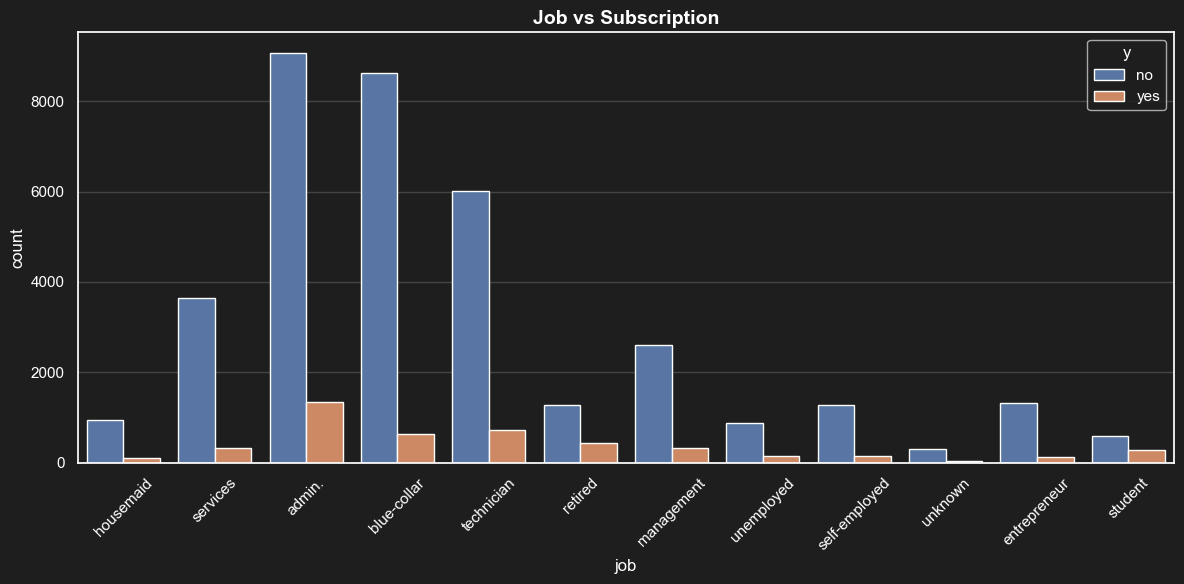

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job', hue='y')
plt.title('Job vs Subscription')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4.3 Age Distribution

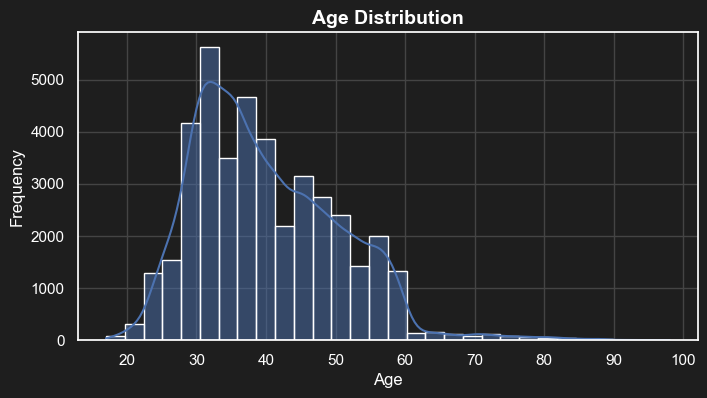

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### 4.4 Age vs Subscription (Boxplot)

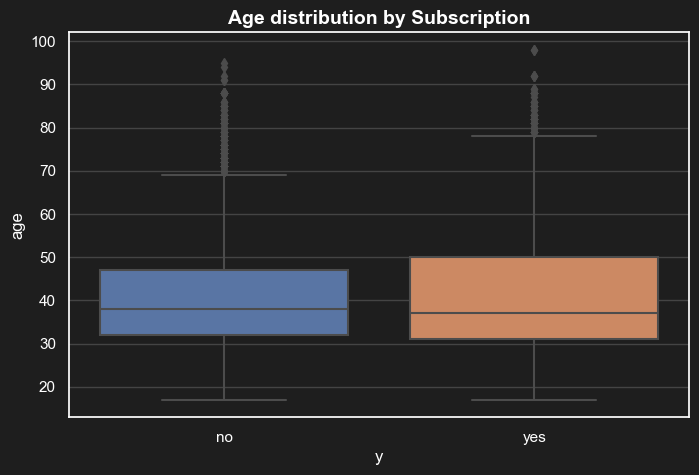

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='y', y='age')
plt.title('Age distribution by Subscription')
plt.show()

#### 4.5 Duration vs Subscription (Duration is important in this dataset)

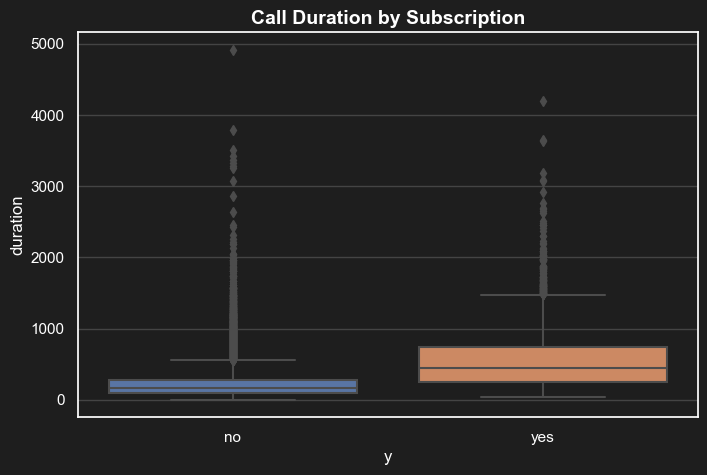

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='y', y='duration')
plt.title('Call Duration by Subscription')
plt.show()

#### 4.6 Correlation Heatmap of numerical features

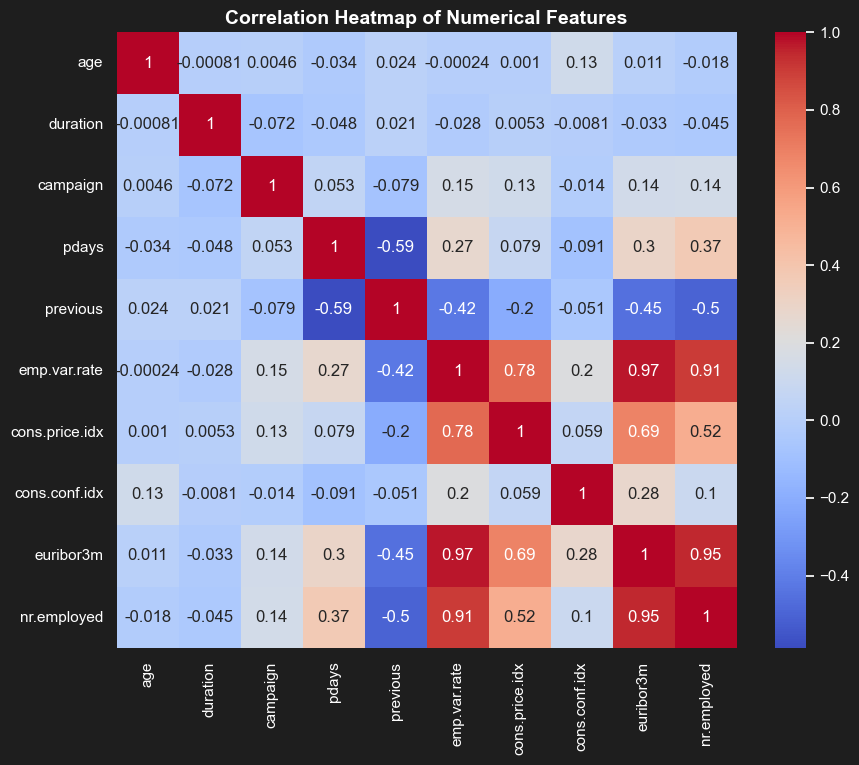

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 5: Encode Categorical Variables
</p>

In [17]:
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print("\nData types after encoding:")
print(df_encoded.dtypes)


Data types after encoding:
age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object


<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 6: Separate Features and Target
    </p>

In [18]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 7: Normalize Numerical Features
    </p>

In [19]:
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 8: Train-Test Split
    </p>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 9: Train Models
    </p>

#### Logistic Regression

In [22]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

#### Decision Tree

In [23]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

#### Random Forest

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 10: Evaluate Models
    </p>

In [25]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Model: Logistic Regression
Accuracy: 0.9046867411364741
Precision: 0.6597938144329897
Recall: 0.39546858908341914
F1-Score: 0.49452672247263363
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7265
           1       0.66      0.40      0.49       971

    accuracy                           0.90      8236
   macro avg       0.79      0.68      0.72      8236
weighted avg       0.89      0.90      0.89      8236


Model: Decision Tree
Accuracy: 0.8844099077221952
Precision: 0.5102260495156081
Recall: 0.4881565396498455
F1-Score: 0.4989473684210526
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      7265
           1       0.51      0.49      0.50       971

    accuracy                           0.88      8236
   macro avg       0.72      0.71      0.72      8236
weighted avg       0.88      0.88      0.88      8236


Model: Random F

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 11: Model Comparison via Bar Plots
    </p>

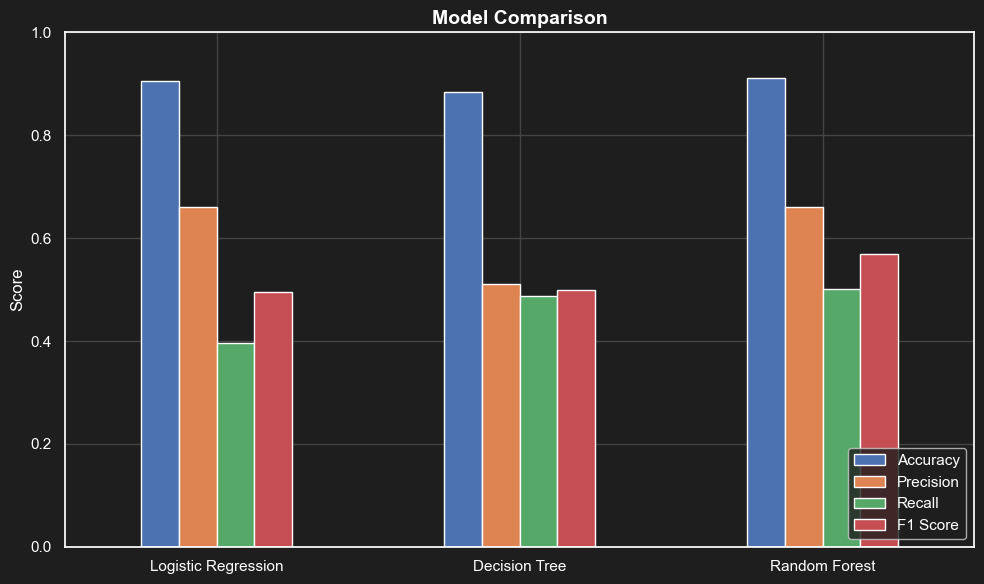

In [26]:
# Collect metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_log), precision_score(y_test, y_pred_tree), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_log), recall_score(y_test, y_pred_tree), recall_score(y_test, y_pred_rf)],
    'F1 Score': [f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_tree), f1_score(y_test, y_pred_rf)]
}

# Create a DataFrame for plotting
metrics_df = pd.DataFrame(metrics, index=models)

# Plot
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 12: ROC Curves for Each Model
    </p>

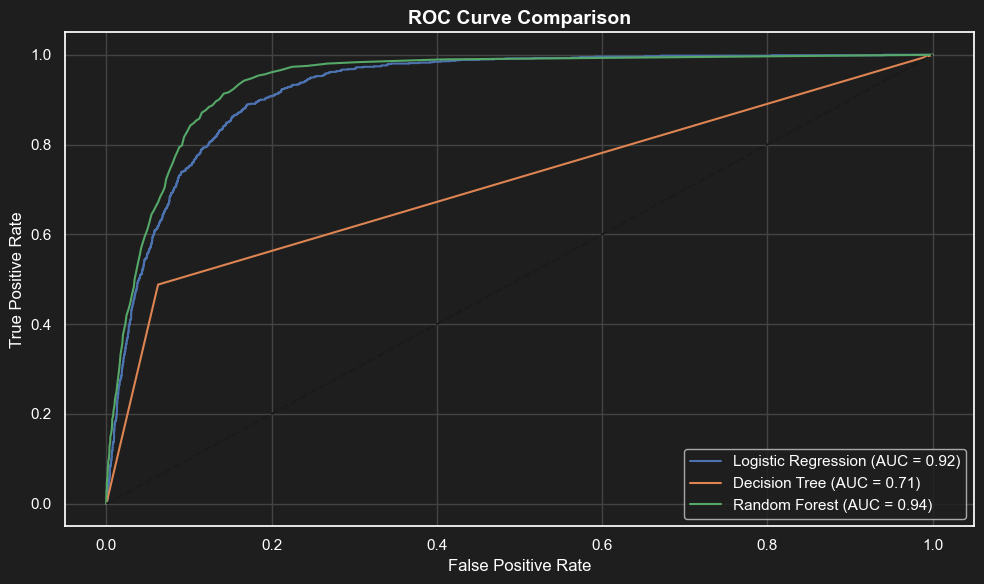

In [27]:
from sklearn.metrics import roc_curve, auc

# Get probabilities
y_probs_log = log_model.predict_proba(X_test)[:, 1]
y_probs_tree = tree_model.predict_proba(X_test)[:, 1]
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_probs_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)

# Compute AUC
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.tight_layout()
plt.show()

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 13: Feature Importance for Tree-Based Models
    </p>

#### Decision Tree

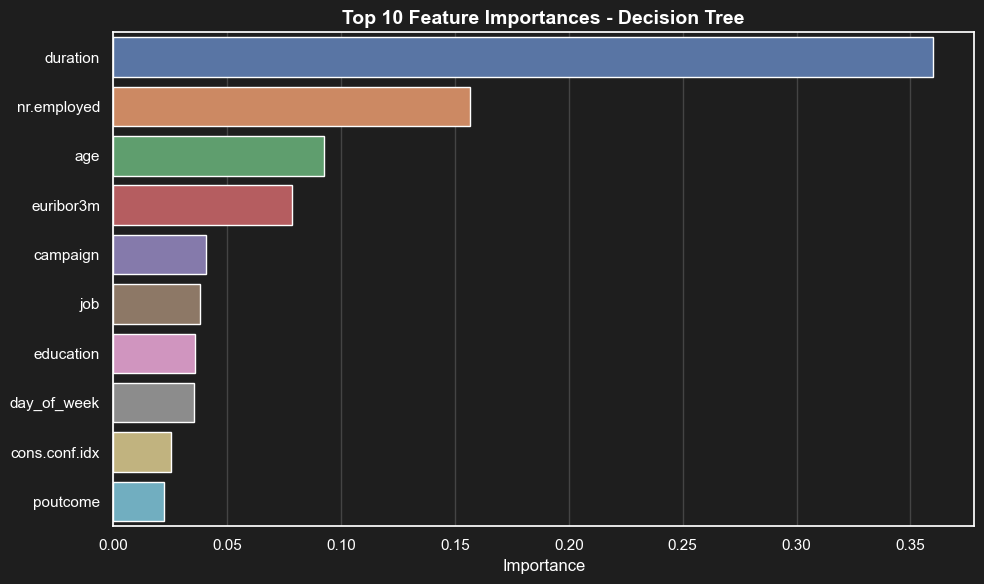

In [32]:
# Feature importances from Decision Tree
feat_importances_tree = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_importances_tree = feat_importances_tree.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_tree.values, y=feat_importances_tree.index)
plt.title("Top 10 Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

#### Random Forest

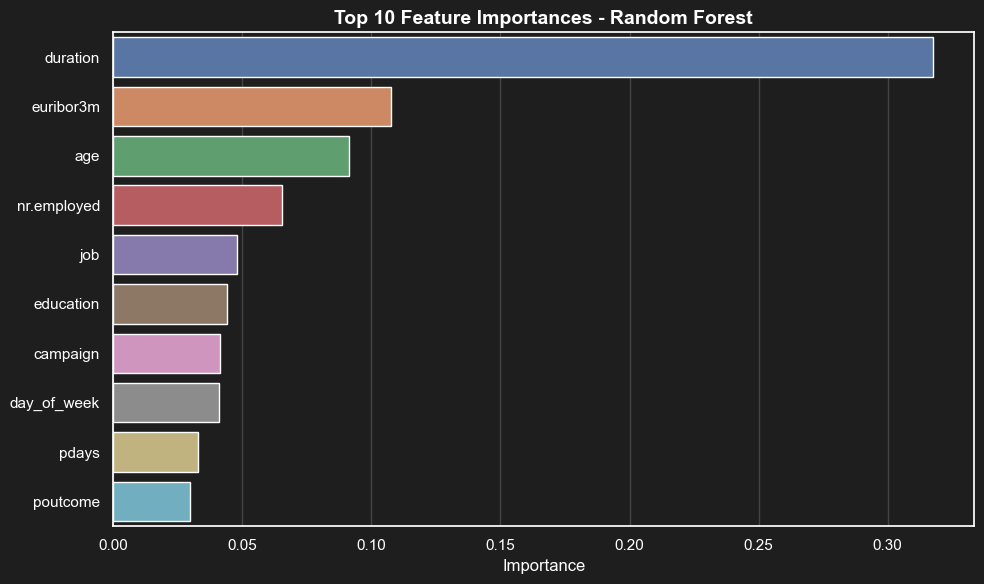

In [34]:
# Feature importances from Random Forest
feat_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances_rf = feat_importances_rf.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances_rf.values, y=feat_importances_rf.index)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

<p style="color: #ffffff; font-size: 25px; background-color: #2c3e50; padding: 10px; border-radius: 5px;">
Step 14: Visualize the Decision Tree with plot_tree
    </p>

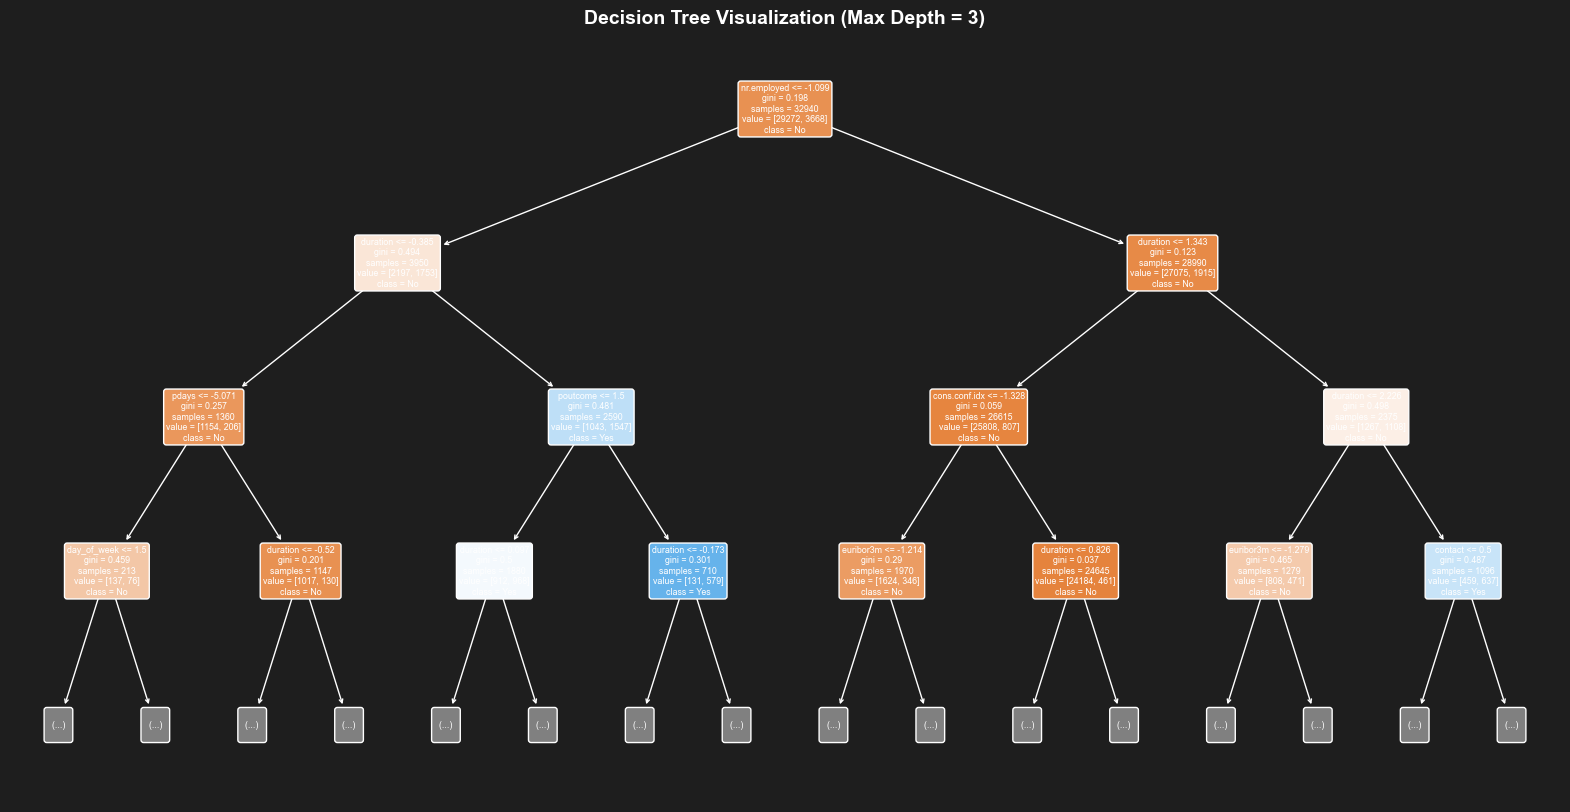

In [35]:
# Feature importances from Decision Tree
feat_importances_tree = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_importances_tree = feat_importances_tree.sort_values(ascending=False).head(10)
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))  # Resize for better readability
plot_tree(
    tree_model, 
    feature_names=X.columns.tolist(),  # ✅ Convert to list
    class_names=['No', 'Yes'],         # Adjust based on your label encoding
    filled=True, 
    rounded=True,
    max_depth=3  # Optional: Limit depth
)
plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()


## Conclusion

This analysis helped in identifying critical factors that influence a client's decision to subscribe to a term deposit.
By focusing on these key variables and optimizing marketing outreach strategies, banks can improve customer conversion rates.
The project also demonstrates the importance of data preprocessing, exploratory analysis, and model evaluation in making data-driven decisions.
